# 文本引导深度图像生成

通过文本提示和初始图像来调节新图像的生成。

可以通过 `adepth_map` 来保留图像结构。

如果没有提供 `adepth_map`，管道将通过集成深度估计模型自动预测深度。

## 官网示例

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

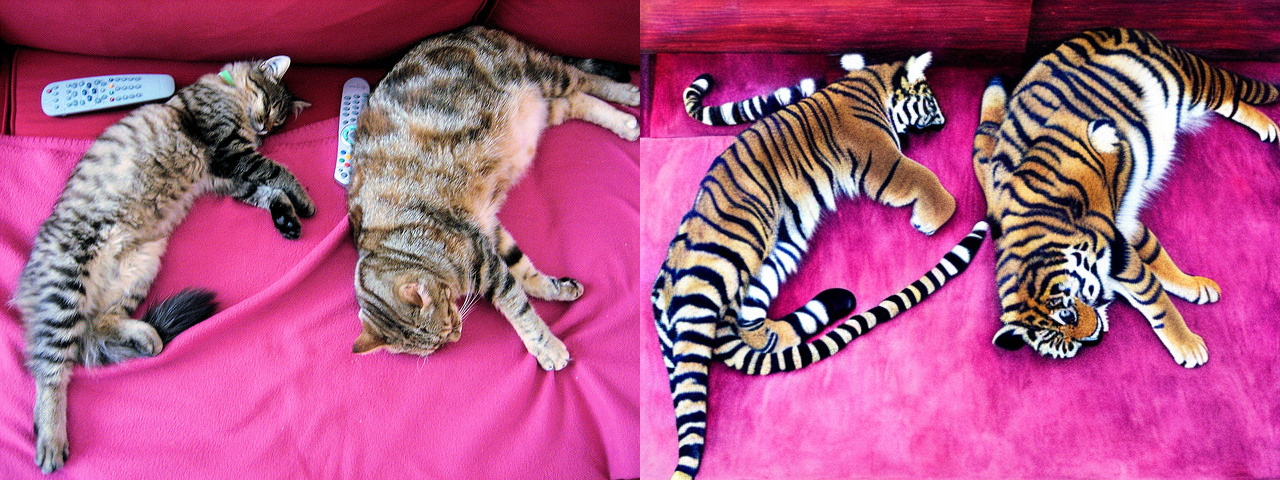

In [1]:
import torch
from diffusers import StableDiffusionDepth2ImgPipeline
from diffusers.utils import load_image, make_image_grid

model_path="/models/stable-diffusion-2-depth"

pipeline = StableDiffusionDepth2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to("cuda")

url = "./000000039769.jpg"
init_image = load_image(url)

prompt = "two tigers"
negative_prompt = "bad, deformed, ugly, bad anatomy"

image = pipeline(prompt=prompt, image=init_image, negative_prompt=negative_prompt, strength=0.7).images[0]

make_image_grid([init_image, image], rows=1, cols=2)

## 自定义示例 - 人像

  0%|          | 0/45 [00:00<?, ?it/s]

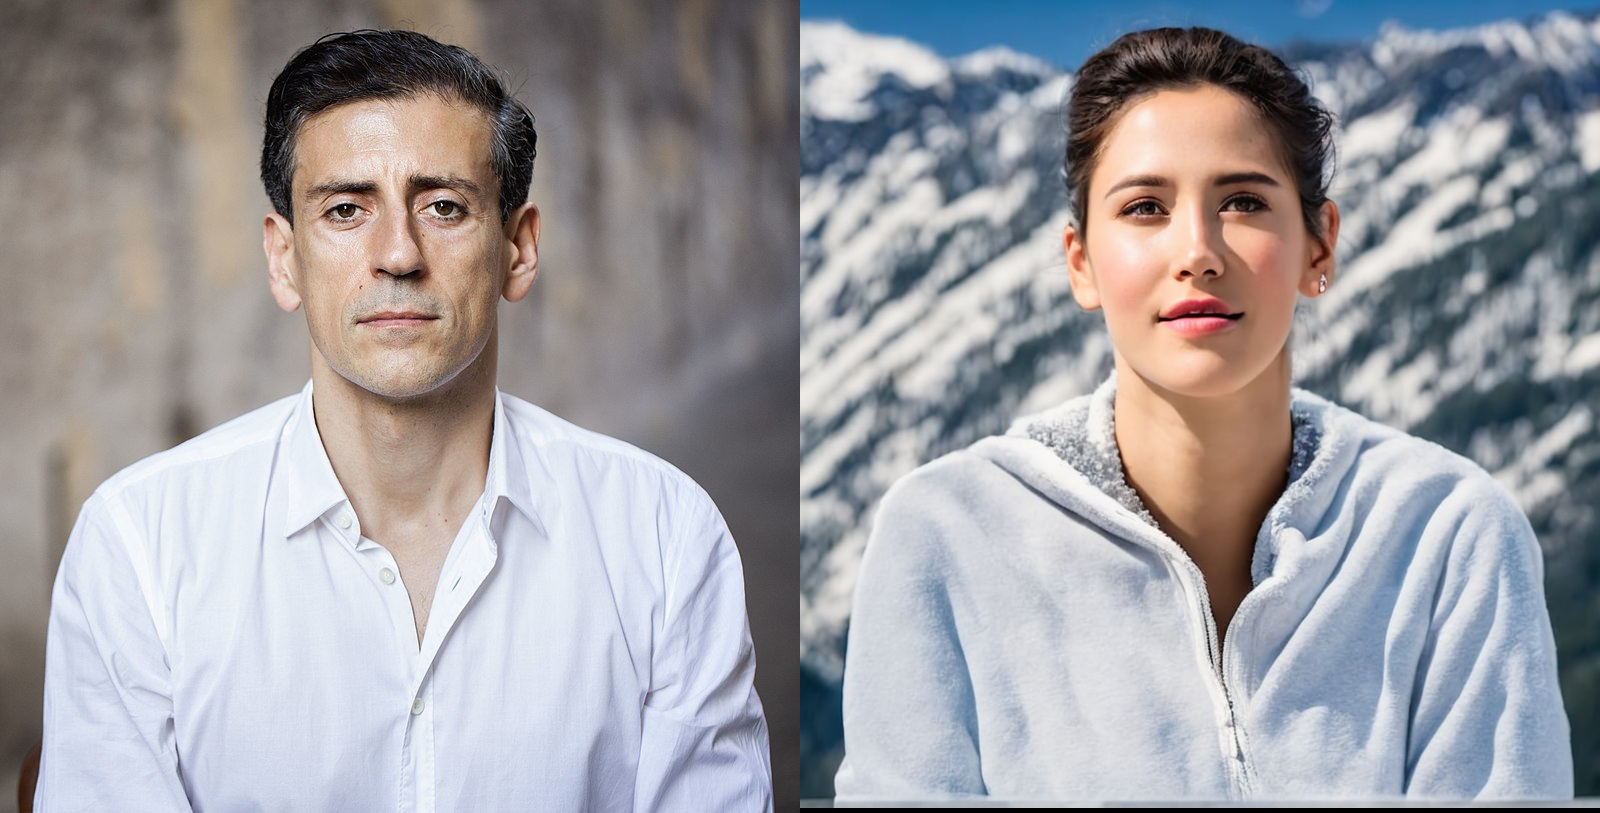

In [35]:
url = "./inpaint2.jpeg"
init_image = load_image(url)

prompt = "The background is snow-capped mountains, and the foreground is a pretty girl."
negative_prompt = "bad, deformed, ugly, bad anatomy, bad gender"
generator = torch.Generator("cuda").manual_seed(6)

image = pipeline(prompt=prompt, image=init_image, negative_prompt=negative_prompt, strength=0.9,
    generator=generator).images[0]

make_image_grid([init_image, image], rows=1, cols=2)

## 自定义示例 - 西红柿

  0%|          | 0/37 [00:00<?, ?it/s]

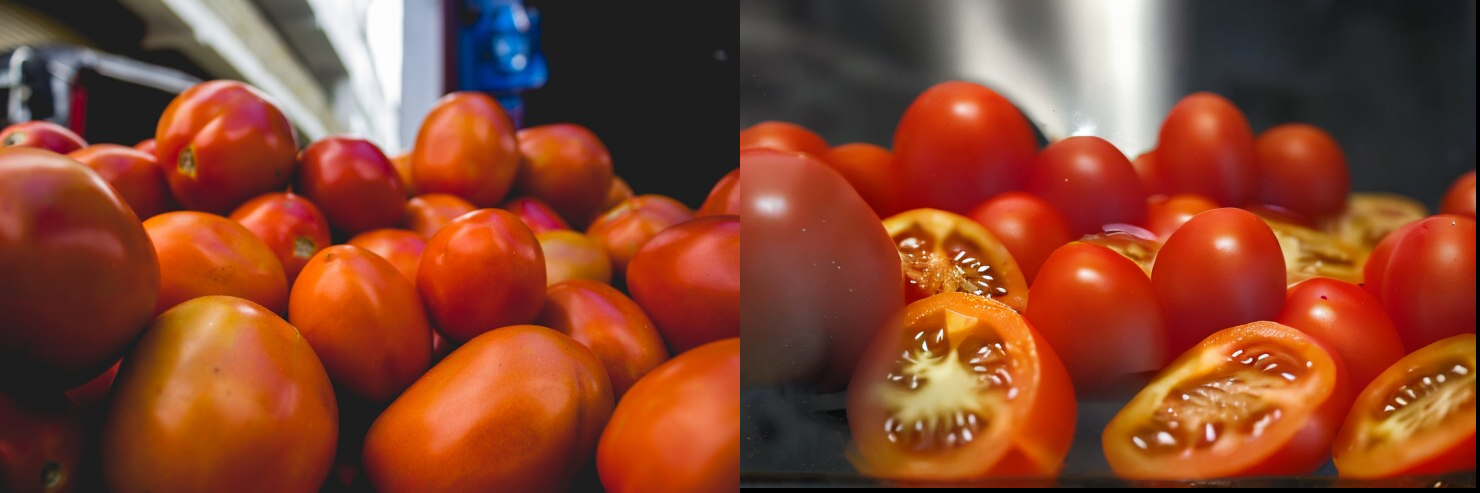

In [56]:
url = "./tomatoes.jpg"
init_image = load_image(url)

prompt = "Some sliced tomatoes mixed."
generator = torch.Generator("cuda").manual_seed(1111)

image = pipeline(prompt=prompt, image=init_image, strength=0.75,
                 generator=generator
                ).images[0]
make_image_grid([init_image, image], rows=1, cols=2)